# NYFA Mentions in Film Courage Videos
**Purpose:** Analyze co-marketing relationship by finding NYFA references in Film Courage descriptions

**Key Questions:**
- How many videos mention NYFA?
- Do NYFA-mention videos perform differently?
- When did mentions start/stop?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Libraries loaded")

✓ Libraries loaded


In [6]:
# Configuration
CONFIG = {
    'data_dir': Path('../data'),
    'output_dir': Path('./output')
}

# Create output directory
CONFIG['output_dir'].mkdir(exist_ok=True)

# Debug: check what files exist
print(f"Looking in: {CONFIG['data_dir'].absolute()}")
print(f"Files found: {list(CONFIG['data_dir'].glob('*.csv'))}")

# Load Film Courage data
csv_file = CONFIG['data_dir'] / 'filmcourage_12132025.csv'
df = pd.read_csv(csv_file)

# Convert dates
df['published_date'] = pd.to_datetime(df['published_date']).dt.tz_localize(None)
df['year'] = df['published_date'].dt.year

print(f"Loaded {len(df):,} Film Courage videos")
print(f"Date range: {df['published_date'].min().year} - {df['published_date'].max().year}")

Looking in: /Users/jamesroot/Desktop/JAMES/Noetheca/youtube/notebooks/../data
Files found: [PosixPath('../data/filmcourage_12132025_tableau.csv'), PosixPath('../data/newyorkfilmacademy_12132025.csv'), PosixPath('../data/filmcourage_12132025.csv')]
Loaded 6,383 Film Courage videos
Date range: 2009 - 2025


In [7]:
# Configuration
CONFIG = {
    'data_dir': Path('../data'),
    'output_dir': Path('./output')
}

# Create output directory
CONFIG['output_dir'].mkdir(exist_ok=True)

# Load Film Courage data
csv_file = CONFIG['data_dir'] / 'filmcourage_12132025.csv'
df = pd.read_csv(csv_file)

# Convert dates
df['published_date'] = pd.to_datetime(df['published_date']).dt.tz_localize(None)
df['year'] = df['published_date'].dt.year

print(f"Loaded {len(df):,} Film Courage videos")
print(f"Date range: {df['published_date'].min().year} - {df['published_date'].max().year}")

Loaded 6,383 Film Courage videos
Date range: 2009 - 2025


In [8]:
# Search for NYFA mentions in descriptions
nyfa_patterns = [
    r'\bNYFA\b',
    r'New York Film Academy',
    r'newyorkfilmacademy',
    r'NY Film Academy'
]

pattern = '|'.join(nyfa_patterns)
df['has_nyfa'] = df['description'].fillna('').str.contains(pattern, case=False, regex=True)

# Segment data
nyfa_videos = df[df['has_nyfa']]
non_nyfa = df[~df['has_nyfa']]

print("="*80)
print("NYFA MENTION SUMMARY")
print("="*80)
print(f"Total videos: {len(df):,}")
print(f"Videos mentioning NYFA: {len(nyfa_videos):,} ({len(nyfa_videos)/len(df)*100:.2f}%)")
print(f"Videos without NYFA: {len(non_nyfa):,} ({len(non_nyfa)/len(df)*100:.2f}%)")

if len(nyfa_videos) > 0:
    print(f"\nFirst NYFA mention: {nyfa_videos['published_date'].min()}")
    print(f"Most recent NYFA mention: {nyfa_videos['published_date'].max()}")

NYFA MENTION SUMMARY
Total videos: 6,383
Videos mentioning NYFA: 52 (0.81%)
Videos without NYFA: 6,331 (99.19%)

First NYFA mention: 2016-07-22 00:00:00
Most recent NYFA mention: 2025-11-08 01:00:24


In [9]:
# Performance comparison
if len(nyfa_videos) > 0:
    print("="*80)
    print("PERFORMANCE COMPARISON")
    print("="*80)
    
    comparison = pd.DataFrame({
        'Metric': ['Count', 'Median Views/Day', 'Median Total Views', 'Median Engagement %'],
        'With NYFA Mention': [
            len(nyfa_videos),
            nyfa_videos['views_per_day'].median(),
            nyfa_videos['view_count'].median(),
            nyfa_videos['engagement_rate'].median()
        ],
        'Without NYFA Mention': [
            len(non_nyfa),
            non_nyfa['views_per_day'].median(),
            non_nyfa['view_count'].median(),
            non_nyfa['engagement_rate'].median()
        ]
    })
    
    print(comparison.to_string(index=False))
    
    # Calculate performance difference
    vpd_ratio = nyfa_videos['views_per_day'].median() / non_nyfa['views_per_day'].median()
    print(f"\nNYFA-mention videos perform {vpd_ratio:.2f}x vs non-mention videos (views/day)")

PERFORMANCE COMPARISON
             Metric  With NYFA Mention  Without NYFA Mention
              Count             52.000               6331.00
   Median Views/Day             12.755                  1.59
 Median Total Views           4098.000               3556.00
Median Engagement %              4.450                  3.29

NYFA-mention videos perform 8.02x vs non-mention videos (views/day)


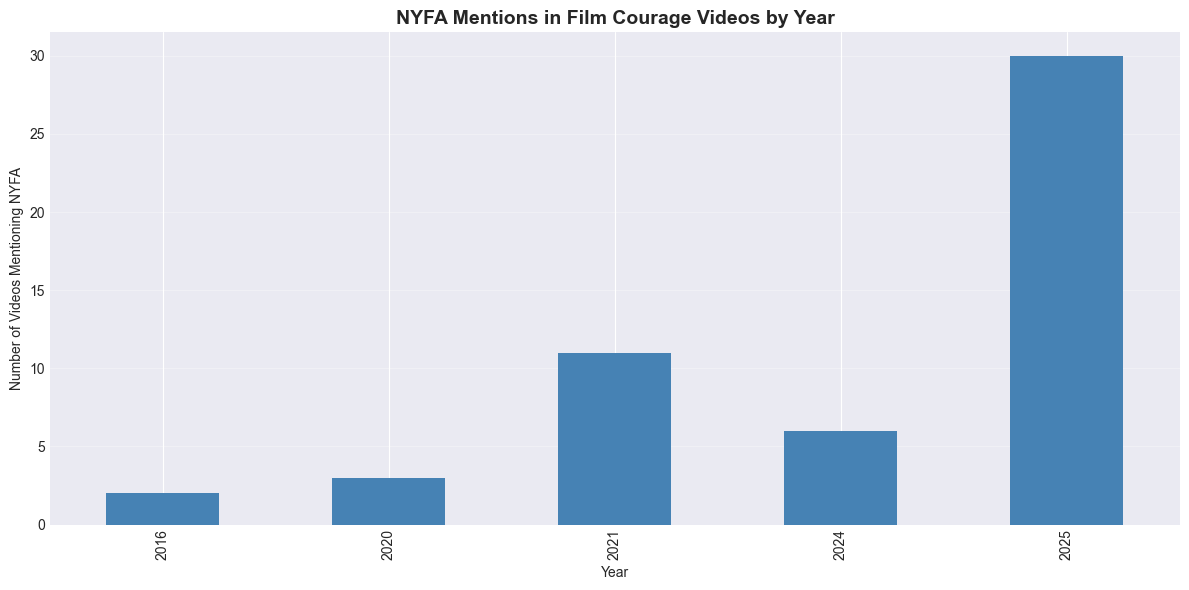

✓ Chart saved


In [10]:
# Timeline of NYFA mentions
if len(nyfa_videos) > 0:
    yearly_mentions = nyfa_videos.groupby('year').size()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    yearly_mentions.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title('NYFA Mentions in Film Courage Videos by Year', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Videos Mentioning NYFA')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./output/nyfa_mentions_timeline.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Chart saved")

In [11]:
# Sample videos with NYFA mentions
if len(nyfa_videos) > 0:
    print("="*80)
    print("TOP 10 PERFORMING VIDEOS WITH NYFA MENTIONS")
    print("="*80)
    
    top_nyfa = nyfa_videos.nlargest(10, 'views_per_day')[[
        'title', 'published_date', 'view_count', 'views_per_day', 'video_id'
    ]].copy()
    
    top_nyfa['url'] = 'https://youtube.com/watch?v=' + top_nyfa['video_id']
    
    for idx, row in top_nyfa.iterrows():
        print(f"\n{row['title']}")
        print(f"  Published: {row['published_date'].date()}")
        print(f"  Views: {row['view_count']:,} ({row['views_per_day']:.1f} views/day)")
        print(f"  URL: {row['url']}")

TOP 10 PERFORMING VIDEOS WITH NYFA MENTIONS

What Does Conflict In Every Scene REALLY Mean? - Eric Conner [FULL INTERVIEW]
  Published: 2025-11-08
  Views: 4,627 (132.2 views/day)
  URL: https://youtube.com/watch?v=BrrBWgI8cec

Most New Writers Have A Hard Time Learning This - Andrew Zinnes
  Published: 2024-12-11
  Views: 41,485 (113.0 views/day)
  URL: https://youtube.com/watch?v=XOkJPDGmxkQ

Where Most New Writers Go Wrong - Andrew Zinnes [FULL INTERVIEW]
  Published: 2025-09-23
  Views: 8,000 (98.8 views/day)
  URL: https://youtube.com/watch?v=cBeQrRARRtU

Acting Is 99% Text Analysis - Lynda Goodfriend
  Published: 2025-11-04
  Views: 2,452 (62.9 views/day)
  URL: https://youtube.com/watch?v=Uu2OgGd9iHU

Biggest Difference Between Bad Cinematography and Great Cinematography - Suki Medencevic
  Published: 2025-05-25
  Views: 9,404 (46.5 views/day)
  URL: https://youtube.com/watch?v=4Z7EThdU4Ao

How One Person Can Start A Production Company - Van Ditthavong
  Published: 2021-02-01
  

In [12]:
# Export summary
summary = {
    'total_filmcourage_videos': len(df),
    'videos_mentioning_nyfa': len(nyfa_videos),
    'percentage_with_nyfa': round(len(nyfa_videos)/len(df)*100, 2),
    'nyfa_median_vpd': float(nyfa_videos['views_per_day'].median()) if len(nyfa_videos) > 0 else 0,
    'non_nyfa_median_vpd': float(non_nyfa['views_per_day'].median()),
    'performance_ratio': round(nyfa_videos['views_per_day'].median() / non_nyfa['views_per_day'].median(), 2) if len(nyfa_videos) > 0 else 0,
    'first_mention': str(nyfa_videos['published_date'].min()) if len(nyfa_videos) > 0 else None,
    'latest_mention': str(nyfa_videos['published_date'].max()) if len(nyfa_videos) > 0 else None
}

import json
output_path = Path('./output/nyfa_mentions_summary.json')
with open(output_path, 'w') as f:
    json.dump(summary, f, indent=2)

print("="*80)
print("SUMMARY EXPORTED")
print("="*80)
print(json.dumps(summary, indent=2))

SUMMARY EXPORTED
{
  "total_filmcourage_videos": 6383,
  "videos_mentioning_nyfa": 52,
  "percentage_with_nyfa": 0.81,
  "nyfa_median_vpd": 12.754999999999999,
  "non_nyfa_median_vpd": 1.59,
  "performance_ratio": 8.02,
  "first_mention": "2016-07-22 00:00:00",
  "latest_mention": "2025-11-08 01:00:24"
}


In [13]:
# Detailed analysis of NYFA-mention videos
if len(nyfa_videos) > 0:
    print("="*100)
    print("ALL NYFA-MENTION VIDEOS - COMPLETE LIST")
    print("="*100)
    
    # Sort by views_per_day descending
    nyfa_sorted = nyfa_videos.sort_values('views_per_day', ascending=False).copy()
    
    # Create URL column
    nyfa_sorted['url'] = 'https://youtube.com/watch?v=' + nyfa_sorted['video_id']
    
    # Display all videos
    for idx, row in nyfa_sorted.iterrows():
        print(f"\n{'='*100}")
        print(f"Title: {row['title']}")
        print(f"Published: {row['published_date'].date()}")
        print(f"Views: {row['view_count']:,} | VPD: {row['views_per_day']:.2f} | Engagement: {row['engagement_rate']:.2f}%")
        print(f"Duration: {row['duration_seconds']/60:.1f} min")
        print(f"URL: {row['url']}")
        print(f"\nDescription excerpt:")
        
        # Find NYFA mentions in description
        desc = str(row['description'])
        for match in re.finditer(pattern, desc, re.IGNORECASE):
            start = max(0, match.start() - 150)
            end = min(len(desc), match.end() + 150)
            context = desc[start:end].replace('\n', ' ')
            print(f"  ...{context}...")

ALL NYFA-MENTION VIDEOS - COMPLETE LIST

Title: What Does Conflict In Every Scene REALLY Mean? - Eric Conner [FULL INTERVIEW]
Published: 2025-11-08
Views: 4,627 | VPD: 132.20 | Engagement: 3.37%
Duration: 85.5 min
URL: https://youtube.com/watch?v=BrrBWgI8cec

Description excerpt:
  ...Why You're Never Too Young To Write A Movie 1:14:53 - 5 Tips For Making A Short Film  Eric Conner has taught hundreds of aspiring storytellers at the New York Film Academy (LA), the Writer’s Store, the Animation Guild and Starcoach – China.  At NYFA, he’s interviewed dozens of entertainment professionals including Djang...
  ...er has taught hundreds of aspiring storytellers at the New York Film Academy (LA), the Writer’s Store, the Animation Guild and Starcoach – China.  At NYFA, he’s interviewed dozens of entertainment professionals including Django Unchained producer Reginald Hudlin and John Wick director Chad Stahelski and...
  ...ONNECT WITH ERIC CONNER https://www.imdb.com/name/nm1289127 https://www

In [14]:
# Aggregate statistics
print("\n" + "="*100)
print("NYFA VIDEO AGGREGATE STATISTICS")
print("="*100)

total_views = nyfa_videos['view_count'].sum()
total_likes = nyfa_videos['like_count'].sum()
total_comments = nyfa_videos['comment_count'].sum()

# Estimate revenue (conservative CPM range)
cpm_low = 2  # $2 per 1000 views
cpm_high = 10  # $10 per 1000 views
revenue_low = (total_views / 1000) * cpm_low
revenue_high = (total_views / 1000) * cpm_high

print(f"\nTotal Videos: {len(nyfa_videos)}")
print(f"Total Views: {total_views:,}")
print(f"Total Likes: {total_likes:,}")
print(f"Total Comments: {total_comments:,}")
print(f"Estimated Revenue Range: ${revenue_low:,.2f} - ${revenue_high:,.2f}")
print(f"\nAverage Views per Video: {total_views/len(nyfa_videos):,.0f}")
print(f"Median Views per Video: {nyfa_videos['view_count'].median():,.0f}")


NYFA VIDEO AGGREGATE STATISTICS

Total Videos: 52
Total Views: 450,640
Total Likes: 16,483
Total Comments: 1,359
Estimated Revenue Range: $901.28 - $4,506.40

Average Views per Video: 8,666
Median Views per Video: 4,098


In [15]:
# Export full list to CSV
nyfa_export = nyfa_sorted[[
    'title', 'published_date', 'view_count', 'like_count', 'comment_count',
    'views_per_day', 'engagement_rate', 'duration_seconds', 'video_id', 'url', 'description'
]].copy()

export_path = CONFIG['output_dir'] / 'nyfa_mentions_full_list.csv'
nyfa_export.to_csv(export_path, index=False)
print(f"\n✓ Exported full list to: {export_path}")


✓ Exported full list to: output/nyfa_mentions_full_list.csv


In [16]:
# Load NYFA channel data for comparison
nyfa_channel_path = CONFIG['data_dir'] / 'newyorkfilmacademy_12132025.csv'
nyfa_channel = pd.read_csv(nyfa_channel_path)

# Convert dates
nyfa_channel['published_date'] = pd.to_datetime(nyfa_channel['published_date']).dt.tz_localize(None)

print(f"Loaded {len(nyfa_channel):,} NYFA channel videos")

Loaded 1,135 NYFA channel videos


In [17]:
# THREE-WAY COMPARISON
print("="*100)
print("THREE-WAY CONTENT CHARACTERISTICS COMPARISON")
print("="*100)

comparison = pd.DataFrame({
    'Metric': [
        'Videos',
        'Median Duration (min)',
        'Median Views/Day',
        'Median Engagement %',
        'Median Total Views',
        'Total Views'
    ],
    'FC NYFA-Mentions': [
        len(nyfa_videos),
        nyfa_videos['duration_seconds'].median() / 60,
        nyfa_videos['views_per_day'].median(),
        nyfa_videos['engagement_rate'].median(),
        nyfa_videos['view_count'].median(),
        nyfa_videos['view_count'].sum()
    ],
    'FC Non-NYFA': [
        len(non_nyfa),
        non_nyfa['duration_seconds'].median() / 60,
        non_nyfa['views_per_day'].median(),
        non_nyfa['engagement_rate'].median(),
        non_nyfa['view_count'].median(),
        non_nyfa['view_count'].sum()
    ],
    'NYFA Channel': [
        len(nyfa_channel),
        nyfa_channel['duration_seconds'].median() / 60,
        nyfa_channel['views_per_day'].median(),
        nyfa_channel['engagement_rate'].median(),
        nyfa_channel['view_count'].median(),
        nyfa_channel['view_count'].sum()
    ]
})

print(comparison.to_string(index=False))

THREE-WAY CONTENT CHARACTERISTICS COMPARISON
               Metric  FC NYFA-Mentions  FC Non-NYFA  NYFA Channel
               Videos         52.000000 6.331000e+03  1.135000e+03
Median Duration (min)         11.866667 7.283333e+00  4.866667e+00
     Median Views/Day         12.755000 1.590000e+00  3.500000e-01
  Median Engagement %          4.450000 3.290000e+00  1.290000e+00
   Median Total Views       4098.000000 3.556000e+03  1.048000e+03
          Total Views     450640.000000 1.039088e+08  1.039181e+07


In [19]:
# TITLE PATTERN ANALYSIS - Three-way comparison
print("="*100)
print("TITLE CHARACTERISTICS - THREE-WAY COMPARISON")
print("="*100)

# Calculate title metrics
nyfa_videos = nyfa_videos.copy()
non_nyfa = non_nyfa.copy()

nyfa_videos['title_length'] = nyfa_videos['title'].str.len()
non_nyfa['title_length'] = non_nyfa['title'].str.len()
nyfa_channel['title_length'] = nyfa_channel['title'].str.len()

title_comparison = pd.DataFrame({
    'Metric': ['Median Title Length (chars)', 'Contains "?" (%)', 'Contains "How" (%)', 'All CAPS words (%)'],
    'FC NYFA-Mentions': [
        nyfa_videos['title_length'].median(),
        (nyfa_videos['title'].str.contains(r'\?').sum() / len(nyfa_videos) * 100),
        (nyfa_videos['title'].str.contains('How', case=False).sum() / len(nyfa_videos) * 100),
        (nyfa_videos['title'].str.contains(r'\b[A-Z]{2,}\b').sum() / len(nyfa_videos) * 100)
    ],
    'FC Non-NYFA': [
        non_nyfa['title_length'].median(),
        (non_nyfa['title'].str.contains(r'\?').sum() / len(non_nyfa) * 100),
        (non_nyfa['title'].str.contains('How', case=False).sum() / len(non_nyfa) * 100),
        (non_nyfa['title'].str.contains(r'\b[A-Z]{2,}\b').sum() / len(non_nyfa) * 100)
    ],
    'NYFA Channel': [
        nyfa_channel['title_length'].median(),
        (nyfa_channel['title'].str.contains(r'\?').sum() / len(nyfa_channel) * 100),
        (nyfa_channel['title'].str.contains('How', case=False).sum() / len(nyfa_channel) * 100),
        (nyfa_channel['title'].str.contains(r'\b[A-Z]{2,}\b').sum() / len(nyfa_channel) * 100)
    ]
})

print(title_comparison.to_string(index=False))

TITLE CHARACTERISTICS - THREE-WAY COMPARISON
                     Metric  FC NYFA-Mentions  FC Non-NYFA  NYFA Channel
Median Title Length (chars)         71.500000    66.000000     49.000000
           Contains "?" (%)          7.692308     9.571948      0.881057
         Contains "How" (%)         21.153846    16.000632      1.233480
         All CAPS words (%)         21.153846    18.480493     58.502203


In [20]:
# Sample titles from each group
print("\n" + "="*100)
print("SAMPLE TITLES (Top 10 by Views/Day from each group)")
print("="*100)

print("\nFC NYFA-MENTION VIDEOS:")
for title in nyfa_videos.nlargest(10, 'views_per_day')['title']:
    print(f"  • {title}")

print("\nFC NON-NYFA VIDEOS:")
for title in non_nyfa.nlargest(10, 'views_per_day')['title']:
    print(f"  • {title}")

print("\nNYFA CHANNEL VIDEOS:")
for title in nyfa_channel.nlargest(10, 'views_per_day')['title']:
    print(f"  • {title}")


SAMPLE TITLES (Top 10 by Views/Day from each group)

FC NYFA-MENTION VIDEOS:
  • What Does Conflict In Every Scene REALLY Mean? - Eric Conner [FULL INTERVIEW]
  • Most New Writers Have A Hard Time Learning This - Andrew Zinnes
  • Where Most New Writers Go Wrong - Andrew Zinnes [FULL INTERVIEW]
  • Acting Is 99% Text Analysis - Lynda Goodfriend
  • Biggest Difference Between Bad Cinematography and Great Cinematography - Suki Medencevic
  • How One Person Can Start A Production Company - Van Ditthavong
  • Big Reason Why Many People Quit The Movie Business - Craig Caton-Largent
  • How To Know You Have A Good Story Idea - Andrew Zinnes
  • How To Know If A Screenplay Has Been Written Too Fast - Andrew Zinnes
  • Best Movies To Watch To Learn The Craft Of Filmmaking - Craig Caton-Largent

FC NON-NYFA VIDEOS:
  • If You Can't Answer These 6 Questions You Don't Have A Story - Glenn Gers
  • Why 99% Of Movies Today Are Garbage - Chris Gore
  • Artists Don't Have To Believe In Themselves To

In [22]:
# Word frequency analysis
from collections import Counter

def get_top_words(df, n=15):
    """Extract most common words from titles (excluding common words)"""
    stopwords = {'the', 'and', 'for', 'with', 'from', 'this', 'that', 'are', 'you', 'your', 'film', 'films'}
    all_words = ' '.join(df['title'].fillna('').str.lower()).split()  # Add fillna('')
    words = [w for w in all_words if len(w) > 3 and w not in stopwords]
    return Counter(words).most_common(n)

print("\n" + "="*100)
print("TOP WORDS IN TITLES")
print("="*100)

print("\nFC NYFA-Mention Videos:")
for word, count in get_top_words(nyfa_videos):
    print(f"  {word}: {count}")

print("\nFC Non-NYFA Videos:")
for word, count in get_top_words(non_nyfa):
    print(f"  {word}: {count}")

print("\nNYFA Channel:")
for word, count in get_top_words(nyfa_channel):
    print(f"  {word}: {count}")


TOP WORDS IN TITLES

FC NYFA-Mention Videos:
  ditthavong: 14
  craig: 10
  caton-largent: 10
  andrew: 9
  zinnes: 9
  know: 9
  eric: 7
  conner: 7
  about: 7
  suki: 7
  [full: 6
  what: 5
  interview]: 5
  movie: 5
  medencevic: 5

FC Non-NYFA Videos:
  movie: 757
  what: 495
  about: 374
  make: 354
  screenplay: 333
  story: 330
  writing: 329
  [full: 314
  interview]: 311
  their: 295
  hollywood: 278
  first: 258
  filmmakers: 257
  should: 253
  know: 241

NYFA Channel:
  york: 506
  academy: 476
  nyfa: 344
  (nyfa): 155
  guest: 152
  student: 112
  school: 97
  speaker: 95
  series: 93
  series:: 84
  20/20: 80
  directed: 79
  (part: 79
  lecture: 54
  discussion: 49


In [23]:
from collections import Counter
import re

def get_top_bigrams(df, n=20):
    """Extract most common two-word phrases from titles"""
    stopwords = {'the', 'and', 'for', 'with', 'from', 'this', 'that', 'are', 'you', 'your', 'film', 'films', 'new', 'york'}
    
    bigrams = []
    for title in df['title'].fillna(''):
        words = re.findall(r'\b\w+\b', title.lower())
        words = [w for w in words if w not in stopwords]
        for i in range(len(words)-1):
            bigrams.append(f"{words[i]} {words[i+1]}")
    
    return Counter(bigrams).most_common(n)

print("="*100)
print("TOP BIGRAMS (TWO-WORD PHRASES)")
print("="*100)

print("\nFC NYFA-Mention Videos:")
for phrase, count in get_top_bigrams(nyfa_videos):
    print(f"  {phrase}: {count}")

print("\nFC Non-NYFA Videos:")
for phrase, count in get_top_bigrams(non_nyfa, n=20):
    print(f"  {phrase}: {count}")

print("\nNYFA Channel:")
for phrase, count in get_top_bigrams(nyfa_channel, n=20):
    print(f"  {phrase}: {count}")

TOP BIGRAMS (TWO-WORD PHRASES)

FC NYFA-Mention Videos:
  van ditthavong: 14
  craig caton: 10
  caton largent: 10
  andrew zinnes: 9
  eric conner: 7
  suki medencevic: 7
  full interview: 5
  how to: 4
  lynda goodfriend: 3
  movie business: 3
  business craig: 3
  to learn: 3
  pro cinematographer: 3
  cinematography suki: 3
  to write: 3
  truth about: 3
  a production: 3
  production company: 3
  what does: 2
  does conflict: 2

FC Non-NYFA Videos:
  full interview: 377
  how to: 362
  a movie: 346
  a screenplay: 241
  don t: 182
  a filmmaker: 172
  a screenwriter: 172
  to be: 142
  to make: 139
  to write: 131
  an actor: 120
  a writer: 120
  of a: 113
  writing a: 112
  movie by: 111
  how i: 109
  make a: 100
  by michael: 98
  in hollywood: 97
  it s: 90

NYFA Channel:
  academy nyfa: 157
  guest speaker: 97
  speaker series: 90
  nyfa guest: 82
  20 20: 80
  20 series: 80
  directed by: 79
  academy student: 79
  at academy: 78
  q a: 69
  school nyfa: 56
  guest lecture:

In [26]:
# COMPREHENSIVE EXPORT - All Analysis Results for Handoff
import json
from datetime import datetime

# Compile complete video list with description excerpts
all_nyfa_videos_detailed = []
nyfa_sorted = nyfa_videos.sort_values('views_per_day', ascending=False).copy()
nyfa_sorted['url'] = 'https://youtube.com/watch?v=' + nyfa_sorted['video_id']

for idx, row in nyfa_sorted.iterrows():
    # Extract NYFA mention context from description
    desc = str(row['description'])
    mention_contexts = []
    for match in re.finditer(pattern, desc, re.IGNORECASE):
        start = max(0, match.start() - 150)
        end = min(len(desc), match.end() + 150)
        context = desc[start:end].replace('\n', ' ')
        mention_contexts.append(context)
    
    all_nyfa_videos_detailed.append({
        'title': row['title'],
        'published': str(row['published_date'].date()),
        'year': int(row['year']),
        'views': int(row['view_count']),
        'likes': int(row['like_count']),
        'comments': int(row['comment_count']),
        'views_per_day': round(row['views_per_day'], 2),
        'engagement_rate': round(row['engagement_rate'], 2),
        'duration_min': round(row['duration_seconds'] / 60, 1),
        'url': f"https://youtube.com/watch?v={row['video_id']}",
        'nyfa_mention_contexts': mention_contexts
    })

# Pre-calculate values that need regex
caps_pattern = r'\b[A-Z]{2,}\b'
nyfa_caps_pct = round((nyfa_channel['title'].str.contains(caps_pattern).sum() / len(nyfa_channel) * 100), 1)
fc_nyfa_duration = round(nyfa_videos['duration_seconds'].median() / nyfa_channel['duration_seconds'].median(), 1)
fc_vs_fc_baseline = round(nyfa_videos['views_per_day'].median() / non_nyfa['views_per_day'].median(), 1)
fc_vs_nyfa = round(nyfa_videos['views_per_day'].median() / nyfa_channel['views_per_day'].median(), 1)
fc_publish_ratio = round(22.6 / 1.7, 1)
nyfa_views_pct = round(450640 / 10391812 * 100, 1)

complete_export = {
    'metadata': {
        'export_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'analyst': 'James Root',
        'notebooks': ['youtube_analysis_v1.ipynb', 'nyfa_mentions_analysis.ipynb'],
        'data_sources': [
            'filmcourage_12132025.csv',
            'newyorkfilmacademy_12132025.csv'
        ]
    },
    
    'channel_performance': {
        'nyfa': {
            'total_videos': len(nyfa_channel),
            'total_views': int(nyfa_channel['view_count'].sum()),
            'median_vpd': float(nyfa_channel['views_per_day'].median()),
            'mean_vpd': float(nyfa_channel['views_per_day'].mean()),
            'engagement_rate_median': float(nyfa_channel['engagement_rate'].median()),
            'median_duration_min': float(nyfa_channel['duration_seconds'].median() / 60),
            'median_views': int(nyfa_channel['view_count'].median()),
            'date_range': f"{nyfa_channel['published_date'].min().year}-{nyfa_channel['published_date'].max().year}"
        },
        'film_courage_all': {
            'total_videos': len(df),
            'total_views': int(df['view_count'].sum()),
            'median_vpd': float(df['views_per_day'].median()),
            'mean_vpd': float(df['views_per_day'].mean()),
            'engagement_rate_median': float(df['engagement_rate'].median()),
            'median_duration_min': float(df['duration_seconds'].median() / 60),
            'median_views': int(df['view_count'].median()),
            'date_range': f"{df['published_date'].min().year}-{df['published_date'].max().year}"
        },
        'film_courage_nyfa_mentions': {
            'total_videos': len(nyfa_videos),
            'total_views': int(nyfa_videos['view_count'].sum()),
            'median_vpd': float(nyfa_videos['views_per_day'].median()),
            'mean_vpd': float(nyfa_videos['views_per_day'].mean()),
            'engagement_rate_median': float(nyfa_videos['engagement_rate'].median()),
            'median_duration_min': float(nyfa_videos['duration_seconds'].median() / 60),
            'avg_views_per_video': int(nyfa_videos['view_count'].mean()),
            'median_views': int(nyfa_videos['view_count'].median()),
            'total_likes': int(nyfa_videos['like_count'].sum()),
            'total_comments': int(nyfa_videos['comment_count'].sum()),
            'date_range': f"{nyfa_videos['published_date'].min().year}-{nyfa_videos['published_date'].max().year}"
        },
        'film_courage_non_nyfa': {
            'total_videos': len(non_nyfa),
            'median_vpd': float(non_nyfa['views_per_day'].median()),
            'engagement_rate_median': float(non_nyfa['engagement_rate'].median()),
            'median_duration_min': float(non_nyfa['duration_seconds'].median() / 60)
        }
    },
    
    'performance_ratios': {
        'fc_vs_nyfa_efficiency': round(df['views_per_day'].median() / nyfa_channel['views_per_day'].median(), 2),
        'fc_nyfa_mentions_vs_fc_baseline': round(nyfa_videos['views_per_day'].median() / non_nyfa['views_per_day'].median(), 2),
        'fc_nyfa_mentions_vs_nyfa_channel': round(nyfa_videos['views_per_day'].median() / nyfa_channel['views_per_day'].median(), 2),
        'fc_engagement_vs_nyfa': round(df['engagement_rate'].median() / nyfa_channel['engagement_rate'].median(), 2)
    },
    
    'nyfa_mentions_timeline': {
        str(year): int(count) 
        for year, count in nyfa_videos.groupby('year').size().items()
    },
    
    'revenue_estimates': {
        'total_views_nyfa_mentions': int(nyfa_videos['view_count'].sum()),
        'cpm_low': 2,
        'cpm_high': 10,
        'revenue_low_estimate': round((nyfa_videos['view_count'].sum() / 1000) * 2, 2),
        'revenue_high_estimate': round((nyfa_videos['view_count'].sum() / 1000) * 10, 2)
    },
    
    'title_analysis': {
        'fc_nyfa_mentions': {
            'median_title_length': float(nyfa_videos['title_length'].median()),
            'question_titles_pct': round((nyfa_videos['title'].str.contains(r'\?').sum() / len(nyfa_videos) * 100), 2),
            'how_in_titles_pct': round((nyfa_videos['title'].str.contains('How', case=False).sum() / len(nyfa_videos) * 100), 2),
            'all_caps_pct': round((nyfa_videos['title'].str.contains(caps_pattern).sum() / len(nyfa_videos) * 100), 2)
        },
        'fc_non_nyfa': {
            'median_title_length': float(non_nyfa['title_length'].median()),
            'question_titles_pct': round((non_nyfa['title'].str.contains(r'\?').sum() / len(non_nyfa) * 100), 2),
            'how_in_titles_pct': round((non_nyfa['title'].str.contains('How', case=False).sum() / len(non_nyfa) * 100), 2),
            'all_caps_pct': round((non_nyfa['title'].str.contains(caps_pattern).sum() / len(non_nyfa) * 100), 2)
        },
        'nyfa_channel': {
            'median_title_length': float(nyfa_channel['title_length'].median()),
            'question_titles_pct': round((nyfa_channel['title'].str.contains(r'\?').sum() / len(nyfa_channel) * 100), 2),
            'how_in_titles_pct': round((nyfa_channel['title'].str.contains('How', case=False).sum() / len(nyfa_channel) * 100), 2),
            'all_caps_pct': round((nyfa_channel['title'].str.contains(caps_pattern).sum() / len(nyfa_channel) * 100), 2)
        }
    },
    
    'bigram_analysis': {
        'fc_nyfa_mentions_top_20': [f"{phrase}: {count}" for phrase, count in get_top_bigrams(nyfa_videos, n=20)],
        'fc_non_nyfa_top_20': [f"{phrase}: {count}" for phrase, count in get_top_bigrams(non_nyfa, n=20)],
        'nyfa_channel_top_20': [f"{phrase}: {count}" for phrase, count in get_top_bigrams(nyfa_channel, n=20)]
    },
    
    'all_nyfa_mention_videos': all_nyfa_videos_detailed,
    
    'key_insights': [
        f"Film Courage publishes {fc_publish_ratio}× more frequently than NYFA",
        f"FC NYFA-mention videos get {fc_vs_fc_baseline}× more views/day than FC baseline",
        f"FC NYFA-mention videos get {fc_vs_nyfa}× more views/day than NYFA's own content",
        f"NYFA uses ALL CAPS in {nyfa_caps_pct}% of titles",
        f"FC NYFA-mention videos are {fc_nyfa_duration}× longer than NYFA videos",
        "Film Courage has increased NYFA mentions from 2-11/year (2016-2024) to 30 in 2025",
        "Film Courage titles use named experts; NYFA titles use institutional branding",
        f"52 FC NYFA-mention videos represent {nyfa_views_pct}% of NYFA's total channel views"
    ],
    
    'strategic_recommendations': [
        'Adopt 10-15 minute expert interview format (not 5 min promotional clips)',
        'Title pattern: "[Instructor Name] on [Topic]" not "NYFA Guest Speaker Series"',
        'Remove "NYFA" from most titles, reduce ALL CAPS from 58.5% to <20%',
        'Increase publishing from 1.7 to 4-8 videos/month minimum',
        'Use educational framing: 21% of titles should include "How" (currently 1.2%)',
        'Reduce question marks in titles from 0.9% to 7-10%',
        'Either negotiate reciprocal promotion from FC or reduce faculty availability',
        'Implement conversion tracking: YouTube views to enrollment pipeline'
    ],
    
    'files_generated': {
        'notebooks': [
            '/Users/jamesroot/Desktop/JAMES/Noetheca/youtube/notebooks/youtube_analysis_v1.ipynb',
            '/Users/jamesroot/Desktop/JAMES/Noetheca/youtube/notebooks/nyfa_mentions_analysis.ipynb'
        ],
        'outputs': [
            './output/analysis_20251213.md',
            './output/insights_20251213.json',
            './output/nyfa_mentions_summary.json',
            './output/nyfa_mentions_full_list.csv',
            './output/complete_analysis_results.json'
        ],
        'charts': [
            './output/channel_comparison_20251213.png',
            './output/duration_vs_performance_20251213.png',
            './output/publishing_velocity_20251213.png',
            './output/vpd_distribution_20251213.png',
            './output/nyfa_mentions_timeline.png'
        ],
        'html_report': 'nyfa_filmcourage_youtube_intelligence_report.html'
    }
}

# Export to JSON
output_path = CONFIG['output_dir'] / 'complete_analysis_results.json'
with open(output_path, 'w') as f:
    json.dump(complete_export, f, indent=2)

print("="*100)
print("COMPREHENSIVE ANALYSIS EXPORT COMPLETE")
print("="*100)
print(f"\nFile: {output_path}")
print(f"Size: {len(json.dumps(complete_export, indent=2)):,} characters")
print("\nContents:")
print(f"  ✓ All {len(all_nyfa_videos_detailed)} NYFA-mention videos with description excerpts")
print("  ✓ All channel performance metrics")
print("  ✓ Performance ratios and comparisons")
print("  ✓ Complete bigram analysis (top 20 for each group)")
print("  ✓ Title analysis characteristics")
print("  ✓ Timeline of NYFA mentions by year")
print("  ✓ Revenue estimates")
print("  ✓ Key insights and recommendations")
print("\nThis file contains ALL analysis results for handoff to new chat.")

COMPREHENSIVE ANALYSIS EXPORT COMPLETE

File: output/complete_analysis_results.json
Size: 136,014 characters

Contents:
  ✓ All 52 NYFA-mention videos with description excerpts
  ✓ All channel performance metrics
  ✓ Performance ratios and comparisons
  ✓ Complete bigram analysis (top 20 for each group)
  ✓ Title analysis characteristics
  ✓ Timeline of NYFA mentions by year
  ✓ Revenue estimates
  ✓ Key insights and recommendations

This file contains ALL analysis results for handoff to new chat.
